In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scipy.ndimage import gaussian_filter1d

In [2]:
df = pd.read_csv("data_air/AB_data_clean.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,neighbourhood_other,neighbourhood_other_label,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,Other,29,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,Midtown,25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Heatmap

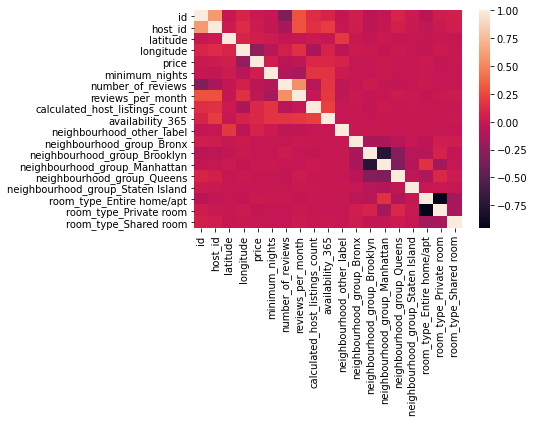

In [3]:
sns.heatmap(df.corr())
plt.show()

## Plots using price

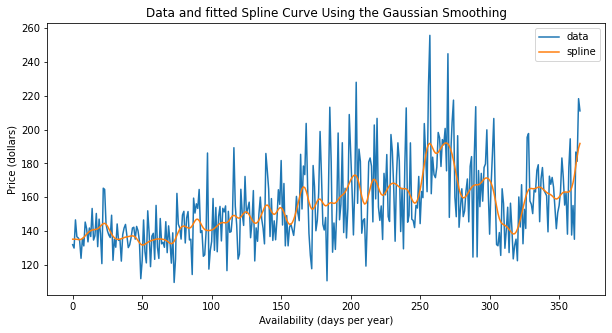

In [4]:
plot_data = df.groupby(['availability_365',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Availability (days per year)")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

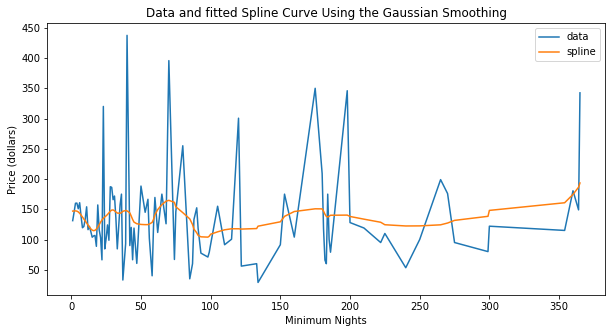

In [5]:
plot_data = df.groupby(['minimum_nights',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Minimum Nights")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

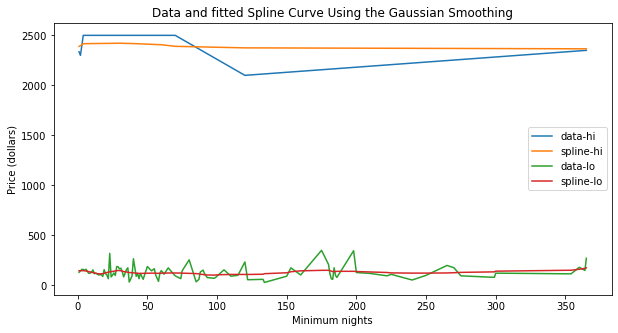

In [6]:
thres = 2000
df_hi = df[df.price > thres]
df_lo = df[df.price <= thres]


plot_data_hi = df_hi.groupby(['minimum_nights',]).mean().loc[:,'price']
plot_data_lo = df_lo.groupby(['minimum_nights',]).mean().loc[:,'price']

x_hi = plot_data_hi.index
y_hi = plot_data_hi.values
y_smoothed_hi = gaussian_filter1d(y_hi, sigma=3)

x_lo = plot_data_lo.index
y_lo = plot_data_lo.values
y_smoothed_lo = gaussian_filter1d(y_lo, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data_hi, label = 'data-hi')
plt.plot(x_hi, y_smoothed_hi, label = 'spline-hi')
plt.plot(plot_data_lo, label = 'data-lo')
plt.plot(x_lo, y_smoothed_lo, label = 'spline-lo')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Minimum nights")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

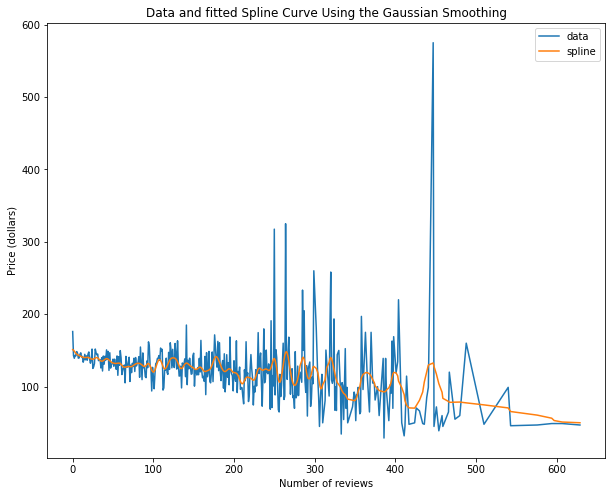

In [7]:
plot_data = df.groupby(['number_of_reviews',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,8))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Number of reviews")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

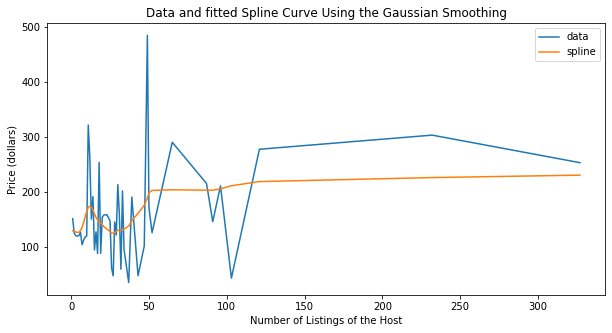

In [8]:
plot_data = df.groupby(['calculated_host_listings_count',]).mean().loc[:,'price']

x = plot_data.index
y = plot_data.values
y_smoothed = gaussian_filter1d(y, sigma=3)

plt.figure(figsize=(10,5))
plt.plot(plot_data, label = 'data')
plt.plot(x, y_smoothed, label = 'spline')
plt.title("Data and fitted Spline Curve Using the Gaussian Smoothing")
plt.xlabel("Number of Listings of the Host")
plt.ylabel("Price (dollars)")
plt.legend()
plt.show()

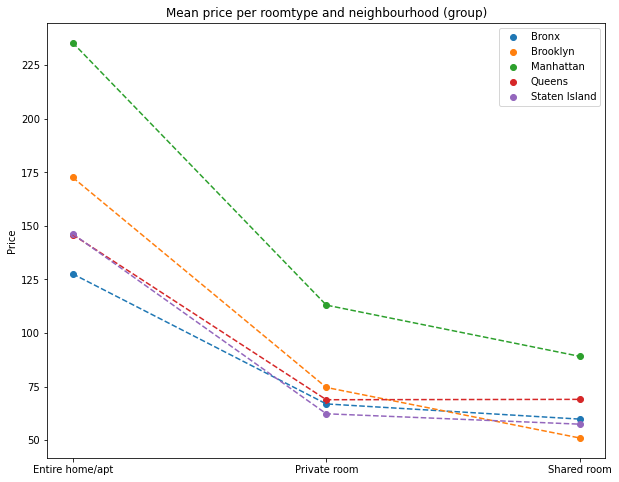

In [9]:
plot_data = df.groupby(['neighbourhood_group','room_type',]).mean().loc[:,'price']


plt.figure(figsize=(10,8))
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Bronx'], label = 'Bronx')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Brooklyn'], label = 'Brooklyn')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Manhattan'], label = 'Manhattan')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Queens'], label = 'Queens')
plt.scatter(x = ['Entire home/apt', 'Private room', 'Shared room'],y = plot_data.loc['Staten Island'], label = 'Staten Island')
plt.plot(plot_data.loc['Bronx'], linestyle='dashed')
plt.plot(plot_data.loc['Brooklyn'], linestyle='dashed')
plt.plot(plot_data.loc['Manhattan'], linestyle='dashed')
plt.plot(plot_data.loc['Queens'], linestyle='dashed')
plt.plot(plot_data.loc['Staten Island'], linestyle='dashed')
plt.title("Mean price per roomtype and neighbourhood (group)")
plt.legend()
plt.ylabel("Price")
plt.show()

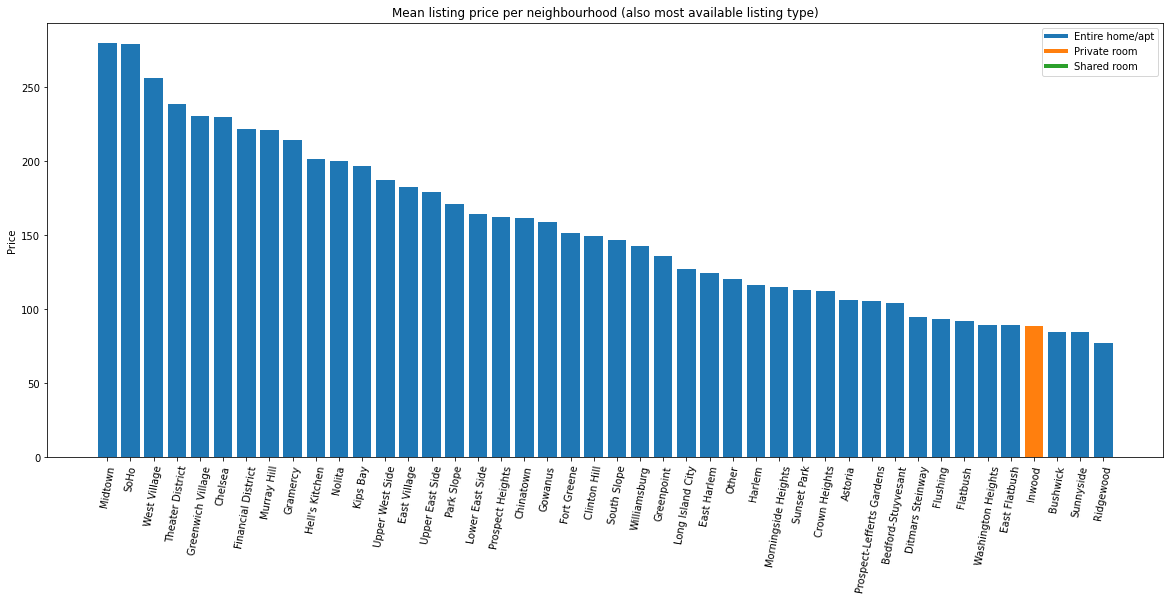

In [10]:
plot_data = df.groupby(['neighbourhood_other',]).mean().loc[:,'price'].sort_values(ascending = False)

plot_data_color = df.groupby(['neighbourhood_other',]).mean()[['room_type_Entire home/apt', 'room_type_Shared room', 'room_type_Private room']]
color = []
for x in plot_data_color.values:
  color.append(np.argmax(x))
plot_data_color['color'] = color

plot_data = pd.DataFrame(plot_data).merge(plot_data_color, left_index = True, right_index = True)

col = {0: '#1f77b4', 1: '#2ca02c', 2: '#ff7f0e'}

plt.figure(figsize=(20,8))
plt.bar(plot_data.index, height = plot_data.price, color = (plot_data.color.map(col)))
plt.title("Mean listing price per neighbourhood (also most available listing type)")
plt.ylabel("Price")
plt.xticks(rotation=80)

legend_elements = [Line2D([0], [0], color=col[0], lw=4, label='Entire home/apt'),
                   Line2D([0], [0], color=col[2], lw=4, label='Private room'),
                   Line2D([0], [0], color=col[1], lw=4, label='Shared room')]

plt.legend(handles=legend_elements,)
plt.show()

## Trees, Rats and Turistic Places

In [11]:
df_trees = pd.read_csv("data_trees/trees_data_clean.csv")
df_trees.head(2)

,spc_common,diameter_cm,latitude,longitude
0,green ash,38.10,40.774001,-73.748105
1,littleleaf linden,5.08,40.572681,-74.119011


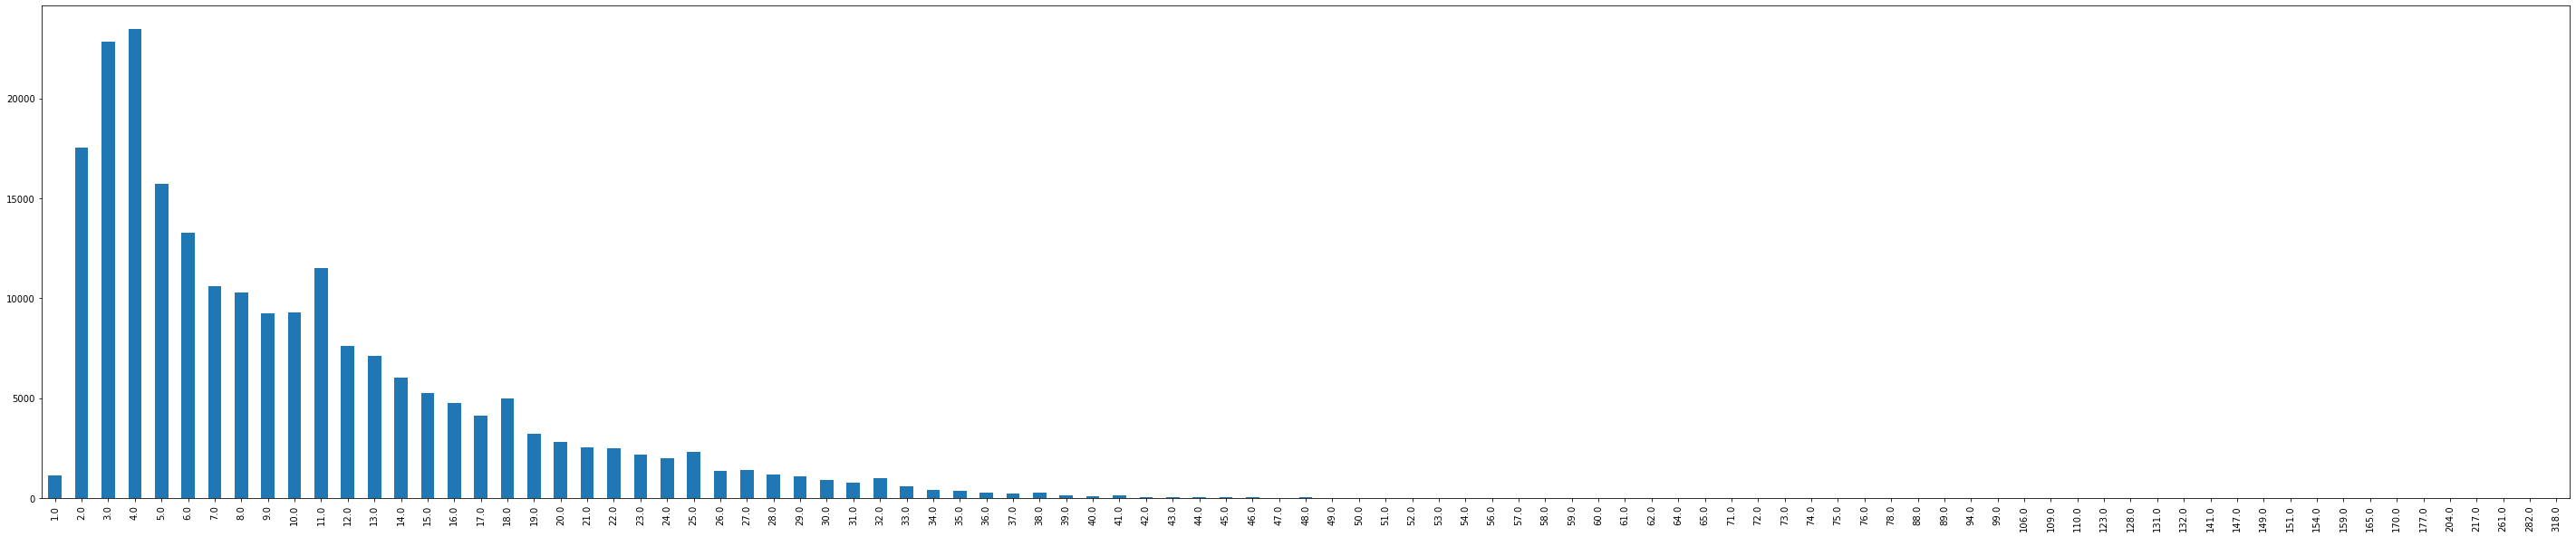

In [12]:
plt.figure(figsize=(50,10))
round((df_trees.diameter_cm/2.54)).value_counts().sort_index().plot.bar()
plt.show()

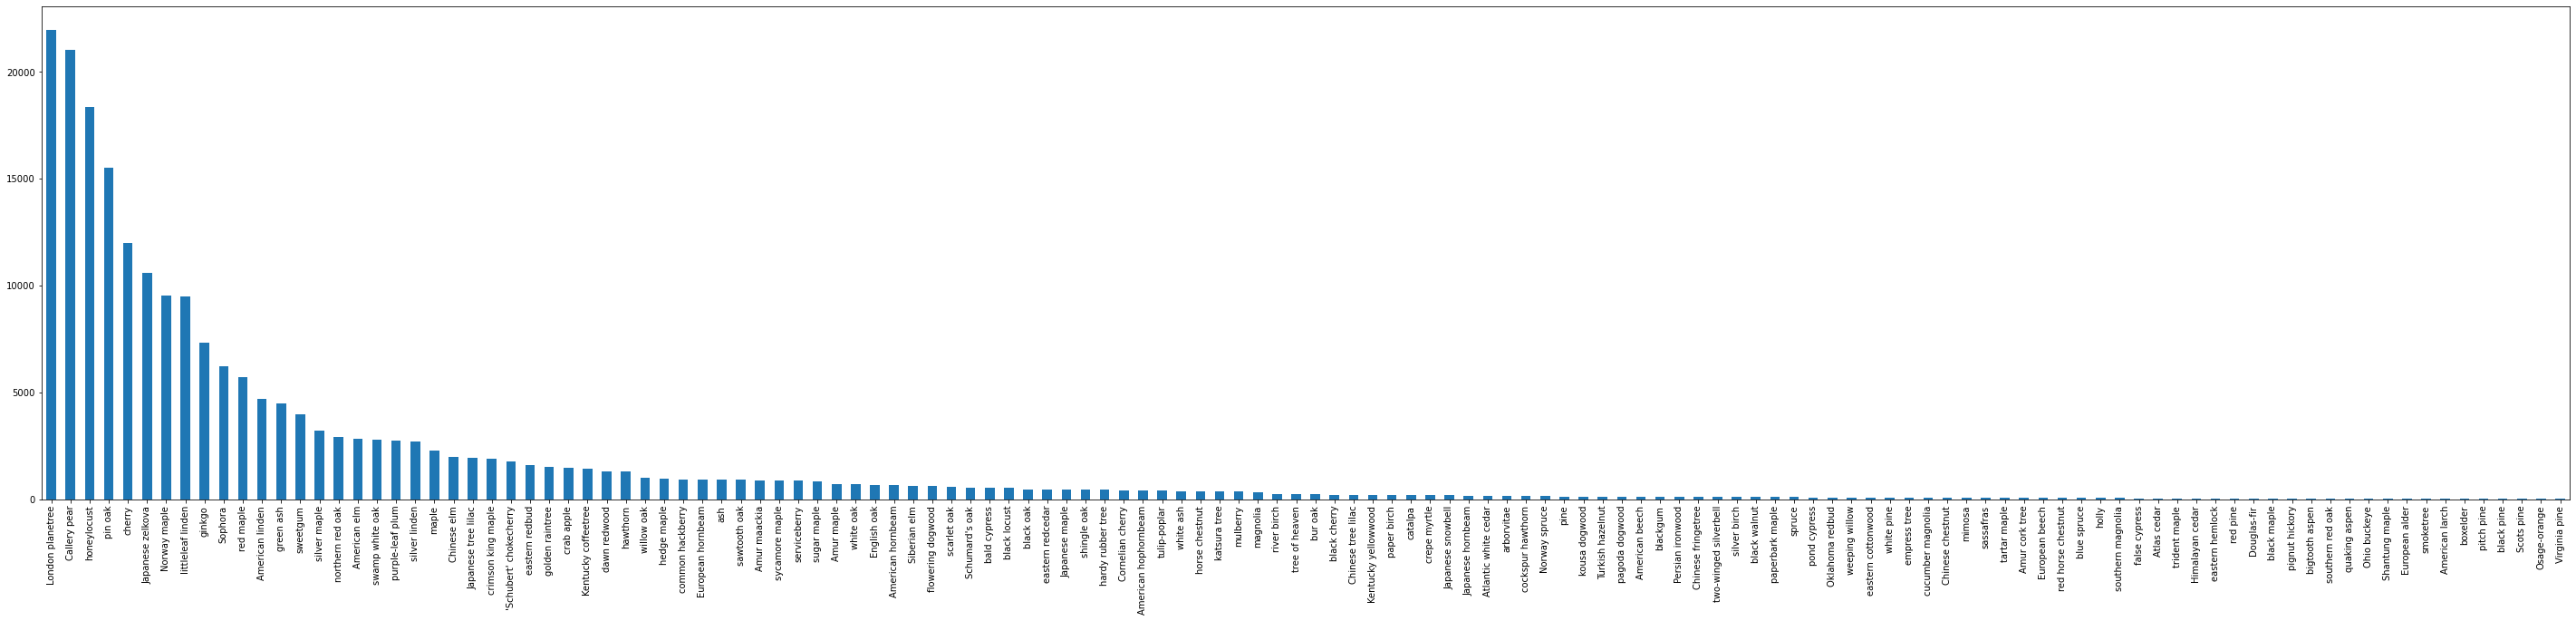

In [13]:
plt.figure(figsize=(50,10))
df_trees.spc_common.value_counts().plot.bar()
plt.show()

In [14]:
df_rats = pd.read_csv("data_rats/rats_data_clean.csv")
df_rats.head(2)

,latitude,longitude,Location Type
0,40.68123,-73.97288,3+ Family Apt. Building
1,40.68123,-73.97288,3+ Family Apt. Building


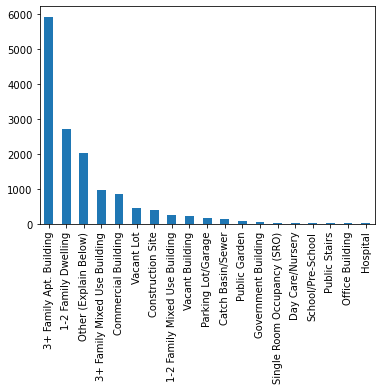

In [15]:
df_rats['Location Type'].value_counts().plot.bar()
plt.show()

In [16]:
df_places = pd.read_csv("data_places/places_data_clean.csv")
df_places.head(2)

,Tourist_Spot,Address,Zipcode,location,latitude,longitude
0,9/11 Memorial & Museum,rld Trade Center (museum: 180 Greenwich St.) M...,10007,"National September 11 Memorial & Museum, 180, ...",40.711304,-74.013283
1,Abyssinian Baptist Church,132 Odell Clark Place New York,10030,"Abyssinian Baptist Church, 132, Odell M Clarke...",40.816636,-73.941478


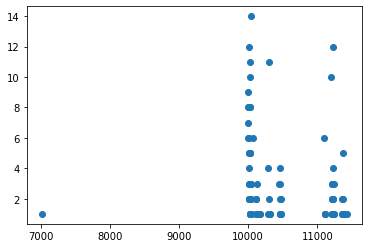

In [17]:
data = df_places['Zipcode'].value_counts().sort_index()
plt.scatter(x = data.index, y = data.values)
plt.show()

## Plots with Price and additioal features (Trees, Rats and Turistic Places)

In [18]:
df_join = pd.read_csv("joined_data.csv")
display(df_join.head(2))
df_join.shape

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,room_type_Shared room,number_of_places_2500m,number_of_places_1000m,number_of_places_500m,number_of_rats_2500m,number_of_rats_1000m,number_of_rats_500m,number_of_trees_2500m,number_of_trees_1000m,number_of_trees_500m
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,...,0.0,8,0,0,456,57,8,5491,1037,321
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,...,0.0,75,29,4,448,54,5,3611,296,46


(48713, 36)

In [19]:
y_borough = df_join.groupby(['neighbourhood_group']).mean()[['number_of_places_2500m','number_of_places_1000m','number_of_places_500m','number_of_rats_2500m','number_of_rats_1000m','number_of_rats_500m','number_of_trees_2500m','number_of_trees_1000m','number_of_trees_500m', 'price']].sort_values(by = ['neighbourhood_group'])

y_borough['number_of_places_2500m'] = y_borough['number_of_places_2500m']/sum(y_borough['number_of_places_2500m'])*100
y_borough['number_of_places_1000m'] = y_borough['number_of_places_1000m']/sum(y_borough['number_of_places_1000m'])*100
y_borough['number_of_places_500m'] = y_borough['number_of_places_500m']/sum(y_borough['number_of_places_500m'])*100
y_borough['number_of_rats_2500m'] = y_borough['number_of_rats_2500m']/sum(y_borough['number_of_rats_2500m'])*100
y_borough['number_of_rats_1000m'] = y_borough['number_of_rats_1000m']/sum(y_borough['number_of_rats_1000m'])*100
y_borough['number_of_rats_500m'] = y_borough['number_of_rats_500m']/sum(y_borough['number_of_rats_500m'])*100
y_borough['number_of_trees_2500m'] = y_borough['number_of_trees_2500m']/sum(y_borough['number_of_trees_2500m'])*100
y_borough['number_of_trees_1000m'] = y_borough['number_of_trees_1000m']/sum(y_borough['number_of_trees_1000m'])*100
y_borough['number_of_trees_500m'] = y_borough['number_of_trees_500m']/sum(y_borough['number_of_trees_500m'])*100
y_borough.price = y_borough.price /sum(y_borough.price)*100
display(y_borough)

,number_of_places_2500m,number_of_places_1000m,number_of_places_500m,number_of_rats_2500m,number_of_rats_1000m,number_of_rats_500m,number_of_trees_2500m,number_of_trees_1000m,number_of_trees_500m,price
neighbourhood_group,,,,,,,,,,
Bronx,6.263503,4.933092,4.247560,22.658626,19.889549,19.727633,20.985741,19.095456,18.854983,14.732135
Brooklyn,10.101810,8.190711,8.224027,39.080683,37.468044,35.691383,22.590235,21.136086,20.570972,20.312718
Manhattan,73.028196,72.570949,71.910080,25.538091,29.509376,32.160629,20.105484,22.169370,22.899070,31.473122
Queens,3.901940,3.234420,3.477671,9.402149,8.880746,8.597219,18.603117,17.638076,17.451489,16.375260
Staten Island,6.704552,11.070828,12.140663,3.320450,4.252285,3.823135,17.715423,19.961012,20.223487,17.106765


In [20]:
colors = {'rats':'#C0C0C0', 'trees':'#79D151', 'places':'#F29D0A', 'prices':'#0C0786'}

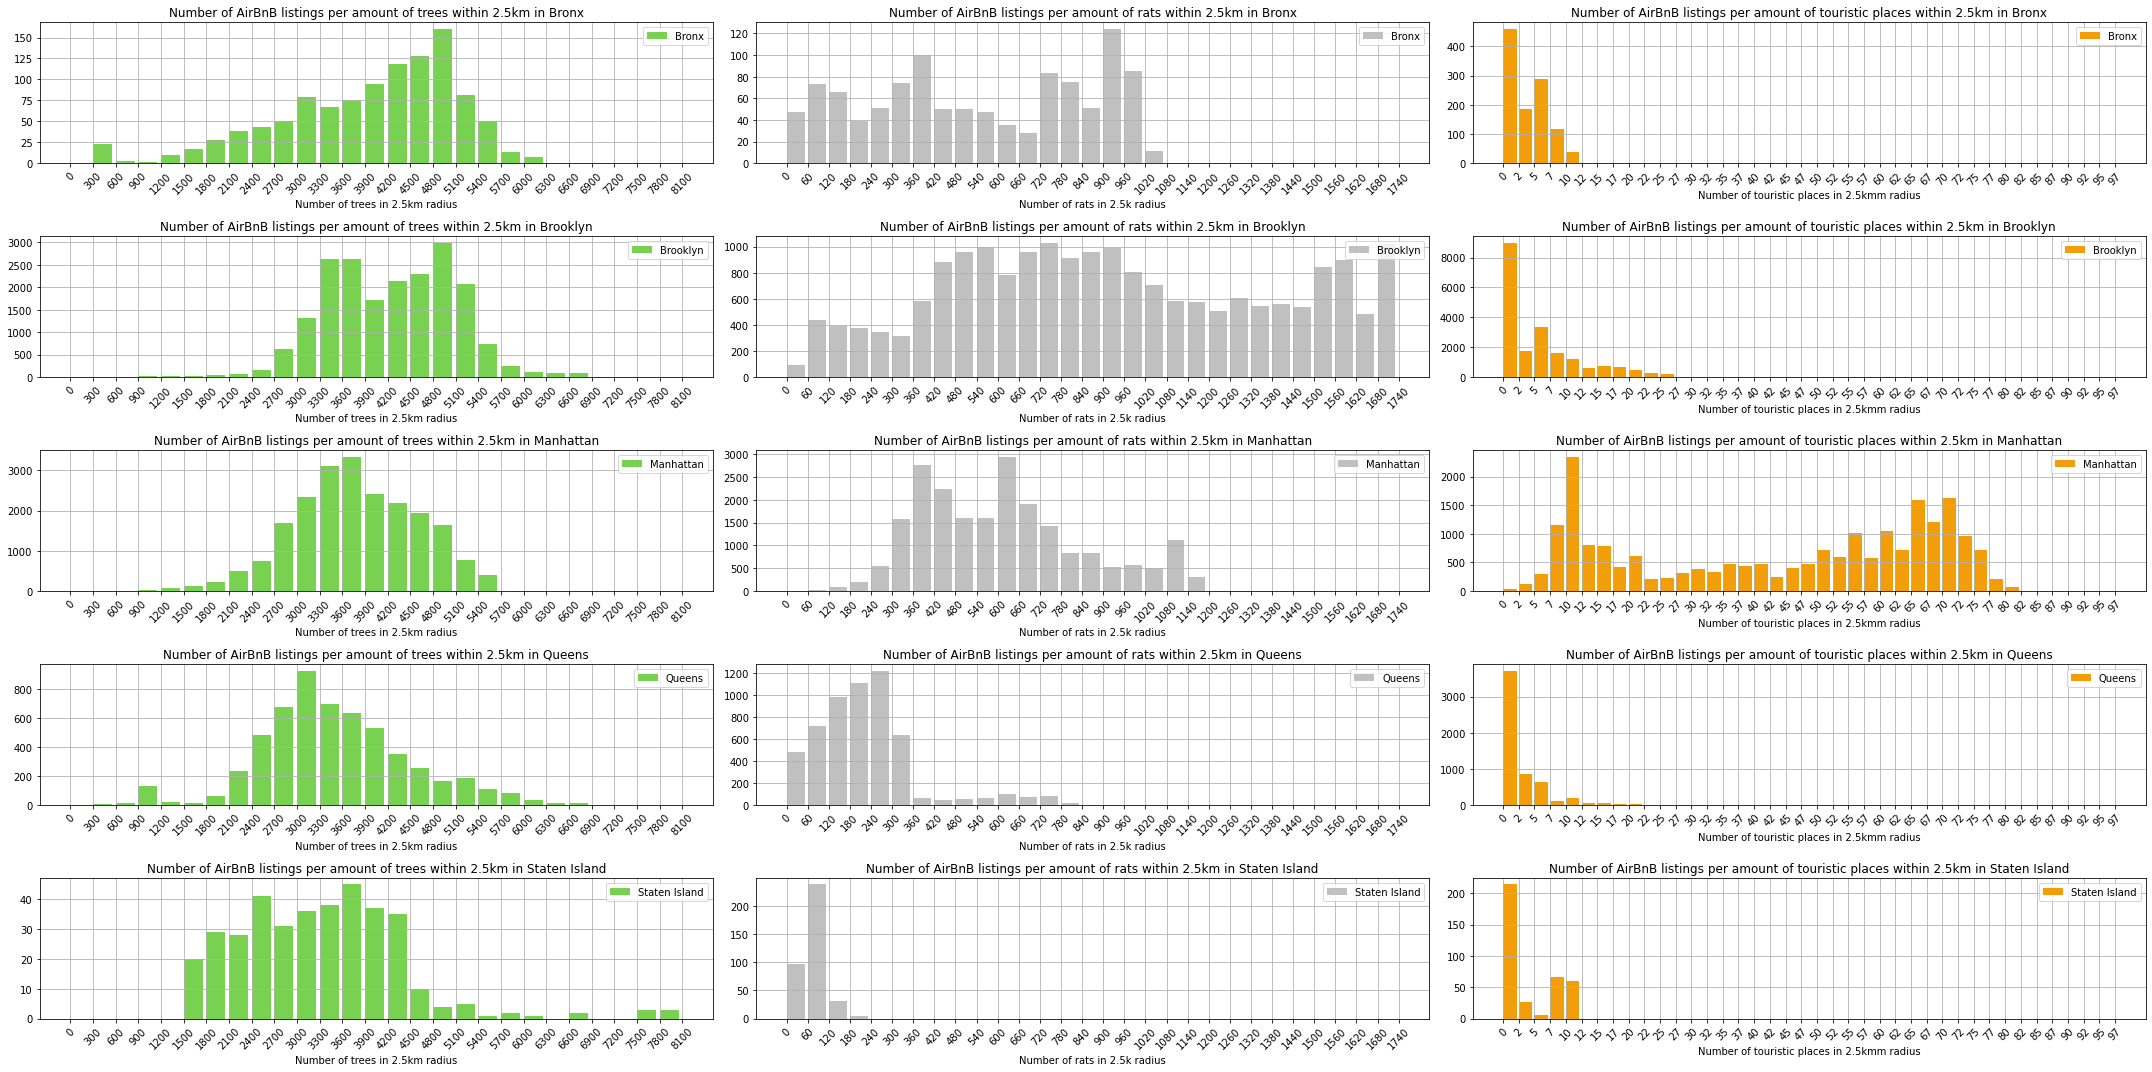

In [22]:
bins_trees = np.arange(0, 8400, 300)
bins_rats = np.arange(0, 1800,60)
bins_places = np.arange(0, 100, 2.5)


n = sorted(df_join.neighbourhood_group.unique().tolist())
fig, ax = plt.subplots(len(y_borough),3, sharey=False, sharex=False)
fig.set_size_inches(30,(len(n)*3))

for idx,i in enumerate(y_borough.index):
    ax[idx,0].set_xlabel('Number of trees in 2.5km radius')
    ax[idx,0].set_title('Number of AirBnB listings per amount of trees within 2.5km in ' +i)
    ax[idx,1].set_xlabel('Number of rats in 2.5k radius')
    ax[idx,1].set_title('Number of AirBnB listings per amount of rats within 2.5km in ' +i)
    ax[idx,2].set_xlabel('Number of touristic places in 2.5kmm radius')
    ax[idx,2].set_title('Number of AirBnB listings per amount of touristic places within 2.5km in ' + i)

color = colors.get('trees')
for i in range(len(n)):
    p = df_join[df_join.neighbourhood_group == n[i]].number_of_trees_2500m.reset_index(drop=True)
    ax[i,0].hist(p,label = n[i], color = color, bins=bins_trees)
    ax[i,0].legend(loc="upper right")
    j = ax[i,0]
    j.set_xticks(bins_trees)
    j.set_xticklabels(map(int, bins_trees), rotation=45)
    for rect in j.patches:
        rect.set_color(color)
        rect.set_width(rect.get_width()*0.8)

color = colors.get('rats')
for i in range(len(n)):
    p = df_join[df_join.neighbourhood_group == n[i]].number_of_rats_2500m.reset_index(drop=True)
    ax[i,1].hist(p,label = n[i], color = color, bins=bins_rats)
    ax[i,1].legend(loc="upper right")
    j = ax[i,1]
    j.set_xticks(bins_rats)
    j.set_xticklabels(map(int, bins_rats), rotation=45)
    for rect in j.patches:
        rect.set_color(color)
        rect.set_width(rect.get_width()*0.8)

color = colors.get('places')
for i in range(len(n)):
    p = df_join[df_join.neighbourhood_group == n[i]].number_of_places_2500m.reset_index(drop=True)
    ax[i,2].hist(p,label = n[i], color = colors.get('places'), bins=bins_places)
    ax[i,2].legend(loc="upper right")
    j = ax[i,2]
    j.set_xticks(bins_places)
    j.set_xticklabels(map(int, bins_places), rotation=45)
    for rect in j.patches:
        rect.set_color(color)
        rect.set_width(rect.get_width()*0.8)

    for i in ax.reshape(-1):
        i.grid()
    plt.autoscale(enable=True, axis='y')
    fig.tight_layout()

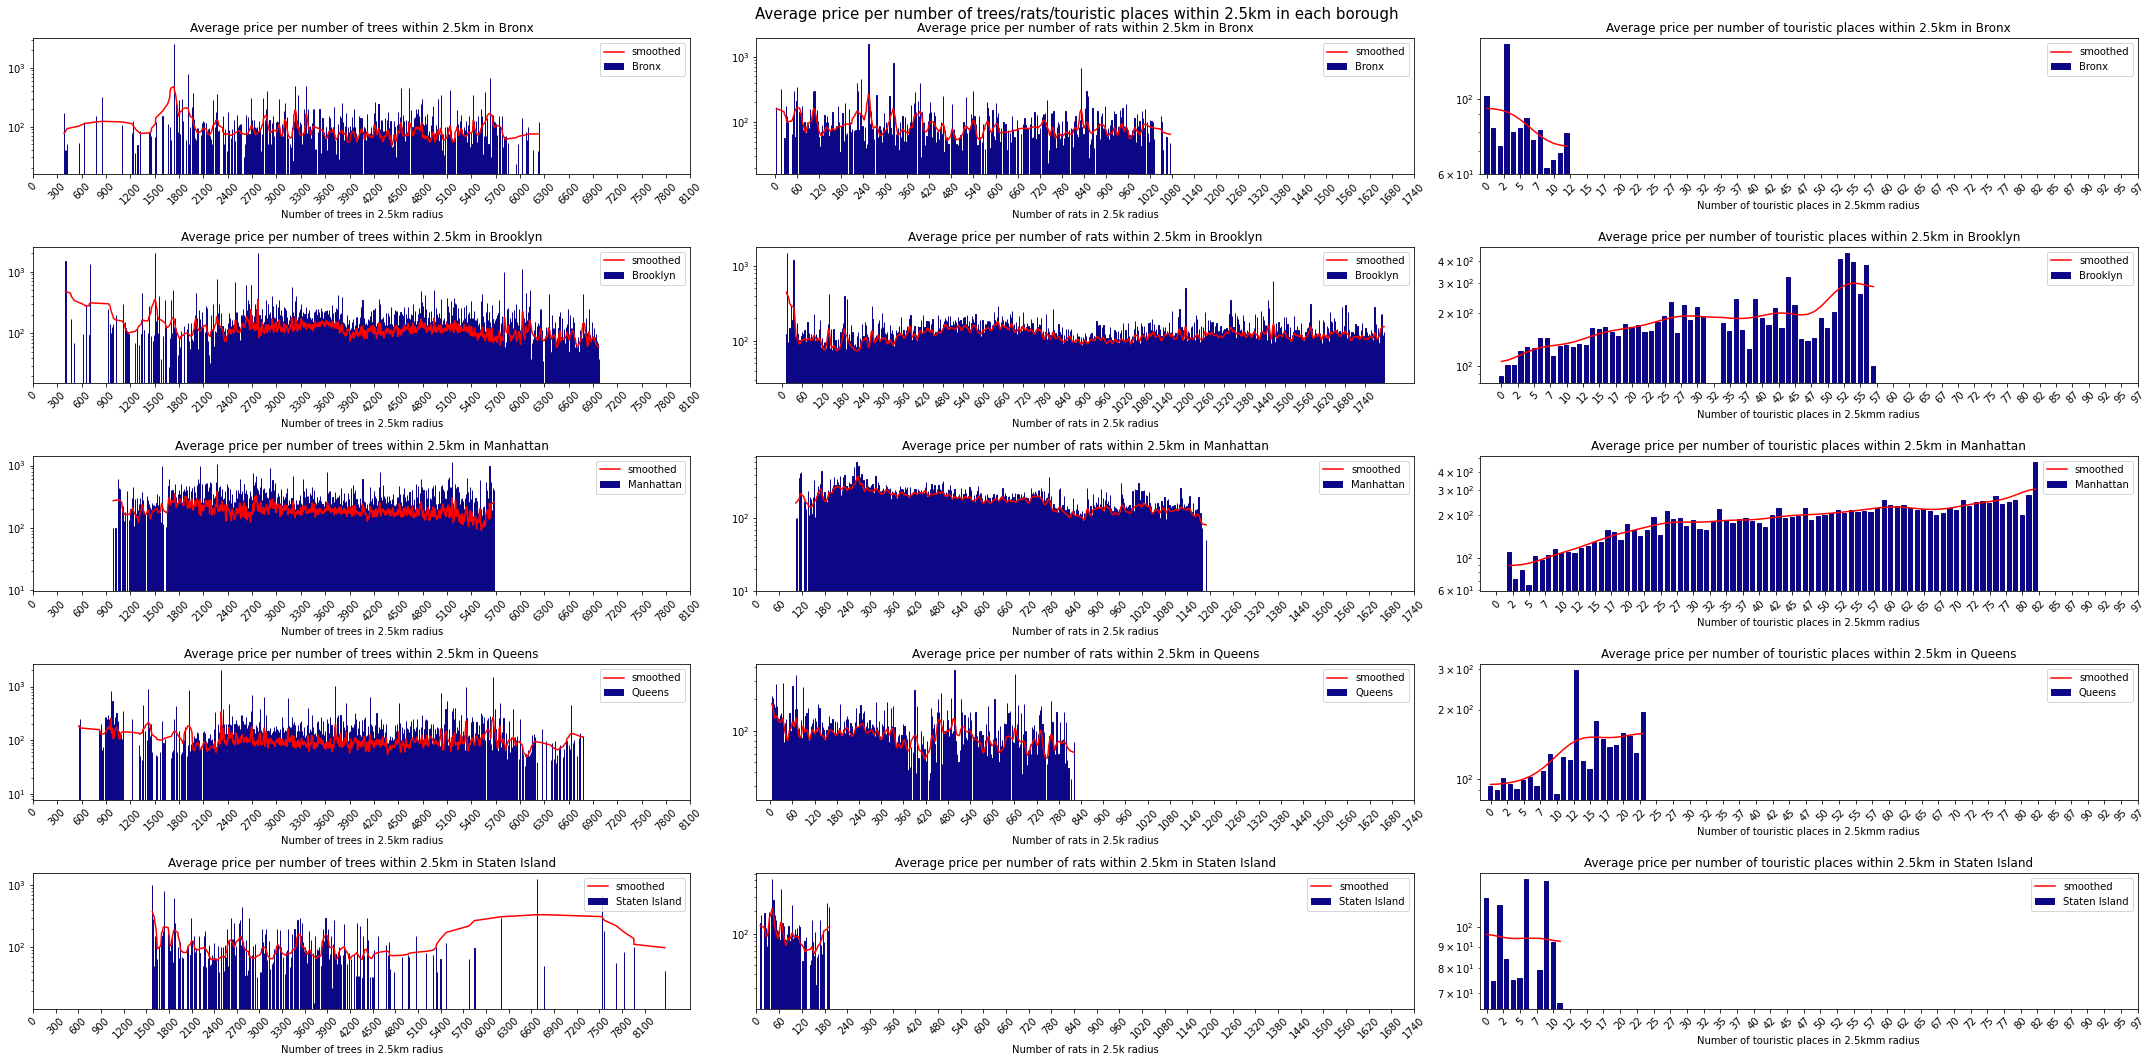

In [23]:
fig, ax = plt.subplots(len(y_borough),3)
fig.set_size_inches(30,(len(n)*3))
fig.suptitle('Average price per number of trees/rats/touristic places within 2.5km in each borough', fontsize = 15)

for idx,i in enumerate(y_borough.index):
    ax[idx,0].set_xlabel('Number of trees in 2.5km radius')
    ax[idx,0].set_title('Average price per number of trees within 2.5km in ' + i)
    ax[idx,1].set_xlabel('Number of rats in 2.5k radius')
    ax[idx,1].set_title('Average price per number of rats within 2.5km in ' + i)
    ax[idx,2].set_xlabel('Number of touristic places in 2.5kmm radius')
    ax[idx,2].set_title('Average price per number of touristic places within 2.5km in ' + i)

n = sorted(df_join.neighbourhood_group.unique().tolist())
color = colors.get('prices')
x = df_join.groupby(['neighbourhood_group','number_of_trees_2500m']).mean()[['price']].sort_values(by = ['neighbourhood_group', 'number_of_trees_2500m'])
for i in range(len(n)):
    p = x.loc[n[i],:].reset_index()
    y_data = p.price
    y_smoothed = gaussian_filter1d(y_data, sigma=3)
    ax[i,0].bar(p.number_of_trees_2500m,p.price,label=n[i],color=color)
    ax[i,0].plot(p.number_of_trees_2500m,y_smoothed,label='smoothed', color = 'r')
    ax[i,0].set_yscale('log')
    ax[i,0].legend(loc="upper right")
    j = ax[i,0]
    j.set_xticks(bins_trees)
    j.set_xticklabels(map(int, bins_trees), rotation=45)
    for rect in j.patches:
        rect.set_color(color)
        rect.set_width(rect.get_width()*0.8)

x = df_join.groupby(['neighbourhood_group','number_of_rats_2500m']).mean()[['price']].sort_values(by = ['neighbourhood_group', 'number_of_rats_2500m'])
for i in range(len(n)):
    p = x.loc[n[i],:].reset_index()
    y_data = p.price
    y_smoothed = gaussian_filter1d(y_data, sigma=3)
    ax[i,1].bar(p.number_of_rats_2500m,p.price,label=n[i],color=color)
    ax[i,1].plot(p.number_of_rats_2500m,y_smoothed,label='smoothed', color = 'r')
    ax[i,1].set_yscale('log')
    ax[i,1].legend(loc="upper right")
    j = ax[i,1]
    j.set_xticks(bins_rats)
    j.set_xticklabels(map(int, bins_rats), rotation=45)
    for rect in j.patches:
        rect.set_color(color)
        rect.set_width(rect.get_width()*0.8)

x = df_join.groupby(['neighbourhood_group','number_of_places_2500m']).mean()[['price']].sort_values(by = ['neighbourhood_group', 'number_of_places_2500m'])
for i in range(len(n)):
    p = x.loc[n[i],:].reset_index()
    y_data = p.price
    y_smoothed = gaussian_filter1d(y_data, sigma=3)
    ax[i,2].bar(p.number_of_places_2500m,p.price,label=n[i],color=color)
    ax[i,2].plot(p.number_of_places_2500m,y_smoothed,label='smoothed', color = 'r')
    ax[i,2].set_yscale('log')
    ax[i,2].legend(loc="upper right")
    j = ax[i,2]
    j.set_xticks(bins_places)
    j.set_xticklabels(map(int, bins_places), rotation=45)
    for rect in j.patches:
        rect.set_color(color)
        rect.set_width(rect.get_width()*0.8)

    fig.tight_layout()